<a href="https://colab.research.google.com/github/RoyMassett/Roy_Ava_Clustering_2019/blob/master/notebooks/Thickness_Interaction_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pip
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [0]:
def pca_2D_raw(data):
    #features being analyzed
  features = ['rh InfPar', 'rh MTG', 'lh middleFrontal', 'lh supFrontal', 'lh supPar', 'lh histCing', 'lh parsOper', 'lh InfPar', 'lh InfPar.1', 'lh supTemp', 
              'lh supTemp.1', 'lh supTemp.2', 'lh supTemp.3', 'lh supTemp (ANT)', 'lh midTemp', 'lh midTemp (ANT)', 'lh infTemp', 'lh fusiform']
  #defining x and y
  x = data.loc[:, features].values   #features
  y = data.loc[:,'Diagnosis'].values      #Diagnosis = dx1; target
  #Standarizing the features
  x = StandardScaler().fit_transform(x)
  pca = PCA(n_components=2)
  #pca.components_ 
  principalComponents = pca.fit_transform(x)

  principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

  return principalDf 

In [0]:
def pca_2D_clustered(data):
    #features being analyzed
  features = ['rh InfPar', 'rh MTG', 'lh middleFrontal', 'lh supFrontal', 'lh supPar', 'lh histCing', 'lh parsOper', 'lh InfPar', 'lh InfPar.1', 'lh supTemp', 
              'lh supTemp.1', 'lh supTemp.2', 'lh supTemp.3', 'lh supTemp (ANT)', 'lh midTemp', 'lh midTemp (ANT)', 'lh infTemp', 'lh fusiform']
  #defining x and y
  x = data.loc[:, features].values   #features
  y = data.loc[:,'Cluster'].values      #Diagnosis = dx1; target
  #Standarizing the features
  x = StandardScaler().fit_transform(x)
  pca = PCA(n_components=2)
  #pca.components_ 
  principalComponents = pca.fit_transform(x)

  principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

  return principalDf 

In [133]:
url = 'https://raw.githubusercontent.com/RoyMassett/Roy_Ava_Clustering_2019/master/thick_long_lvPPA_Interaction.csv'
interaction = pd.read_csv(url)
interaction.head()

,PIDN,Unnamed: 1,Diagnosis,time_dff_year,AgeAtDC,Sex,ScannerID,Hand,Educ,Unnamed: 9,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,762,1,1,1.704,60,0,1,0,18.0,NaN,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,NaN,NaN,NaN,NaN
1,762,0,1,NaN,62,0,1,0,18.0,NaN,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,NaN,NaN,NaN,NaN
2,767,1,1,1.529,73,0,3,0,20.0,NaN,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,NaN,NaN,NaN,NaN
3,767,0,1,NaN,75,0,3,0,20.0,NaN,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,NaN,NaN,NaN,NaN
4,1416,1,1,1.381,61,1,1,0,16.0,NaN,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,NaN,NaN,NaN,NaN


In [134]:
#features being analyzed
features = ['rh InfPar', 'rh MTG', 'lh middleFrontal', 'lh supFrontal', 'lh supPar', 'lh histCing', 'lh parsOper', 'lh InfPar', 'lh InfPar.1', 'lh supTemp', 
            'lh supTemp.1', 'lh supTemp.2', 'lh supTemp.3', 'lh supTemp (ANT)', 'lh midTemp', 'lh midTemp (ANT)', 'lh infTemp', 'lh fusiform']
#defining x and y
x = interaction.loc[:, features].values   #features
y = interaction.loc[:,'Diagnosis'].values      #Diagnosis = dx1; target
#Standarizing the features
x = StandardScaler().fit_transform(x)

x

array([[-0.46791767, -1.00634845, -0.50955624, ...,  0.38848971,
         0.68546109,  0.21367724],
       [ 0.02779573, -0.83317014, -0.25338651, ..., -0.03616645,
         0.61354467,  0.08391093],
       [-0.01611324,  0.17758364,  0.14108071, ...,  0.74645612,
         0.56423086,  0.77855667],
       ...,
       [-1.25853261, -0.56487983, -2.14371648, ...,  0.20655185,
         0.40670507,  0.00764031],
       [-1.37838924, -1.75615042, -2.10096343, ..., -3.15782467,
        -2.55814604, -0.95179719],
       [-1.9730838 , -1.916419  , -2.20293404, ..., -3.52546976,
        -2.6832666 , -1.09192958]])

In [135]:
interaction_features_with_diagnosis = interaction.drop(['PIDN', 'Unnamed: 1', 'time_dff_year', 'AgeAtDC', 'Sex', 'ScannerID', 'Hand', 'Educ', 'Unnamed: 9', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'], axis= 1)
interaction_features = interaction_features_with_diagnosis.drop('Diagnosis', axis= 1)
interaction.head()

,PIDN,Unnamed: 1,Diagnosis,time_dff_year,AgeAtDC,Sex,ScannerID,Hand,Educ,Unnamed: 9,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,762,1,1,1.704,60,0,1,0,18.0,NaN,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,NaN,NaN,NaN,NaN
1,762,0,1,NaN,62,0,1,0,18.0,NaN,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,NaN,NaN,NaN,NaN
2,767,1,1,1.529,73,0,3,0,20.0,NaN,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,NaN,NaN,NaN,NaN
3,767,0,1,NaN,75,0,3,0,20.0,NaN,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,NaN,NaN,NaN,NaN
4,1416,1,1,1.381,61,1,1,0,16.0,NaN,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a2fc39e80>,
      dtype=object)

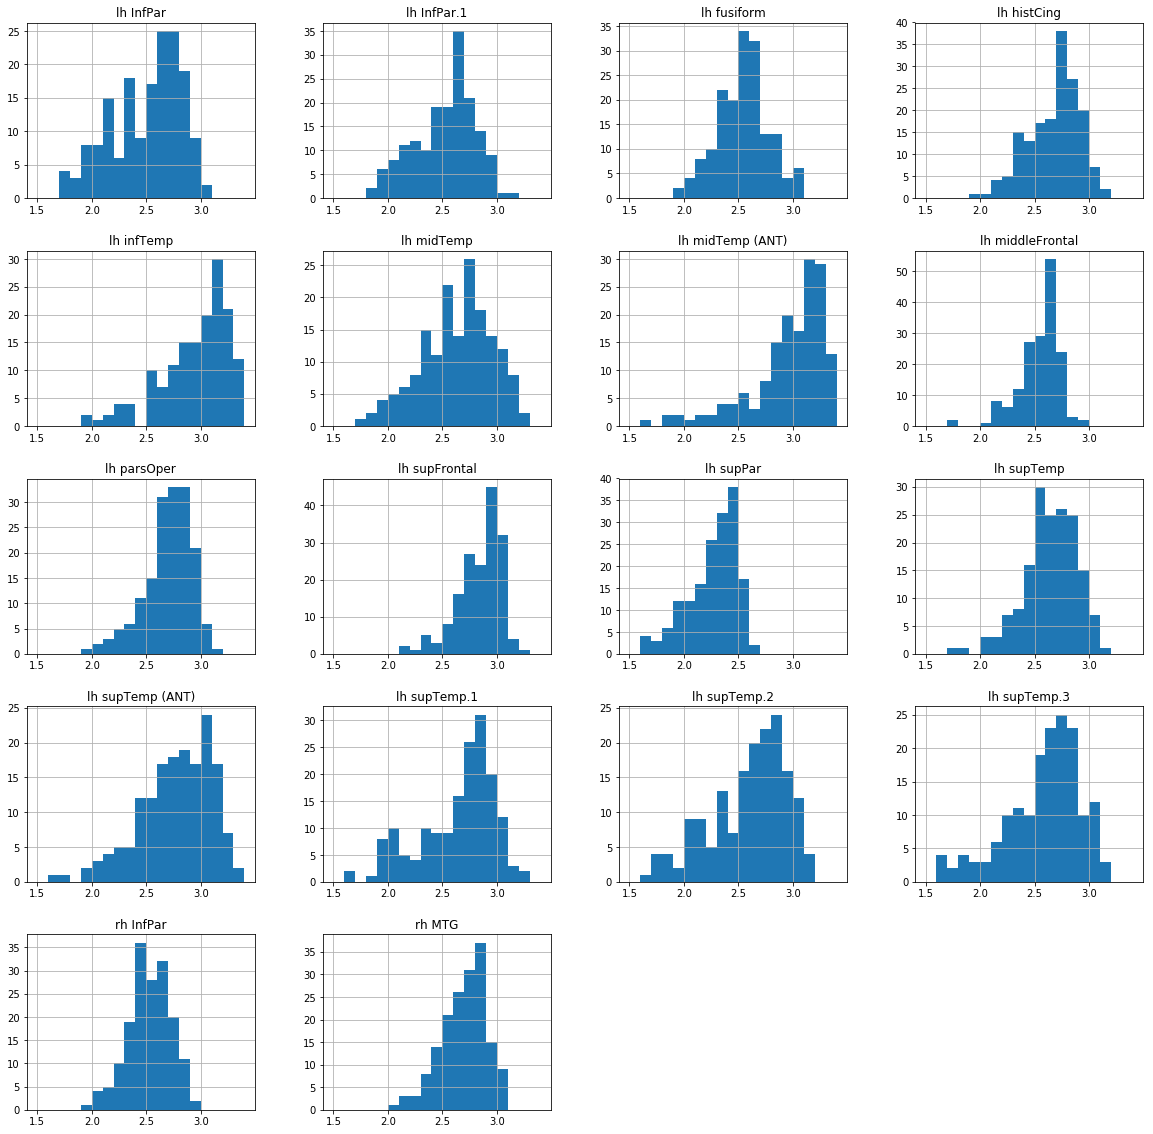

In [140]:
interaction_features.hist(bins=np.arange(1.5, 3.5, .1), figsize = [20, 20])

In [179]:
long_form = pd.melt(interaction_features_with_diagnosis, id_vars="Diagnosis", value_vars=features)
long_form.head()

,Diagnosis,variable,value
0,1,rh InfPar,2.435025
1,1,rh InfPar,2.533837
2,1,rh InfPar,2.525084
3,1,rh InfPar,2.510786
4,1,rh InfPar,2.613600


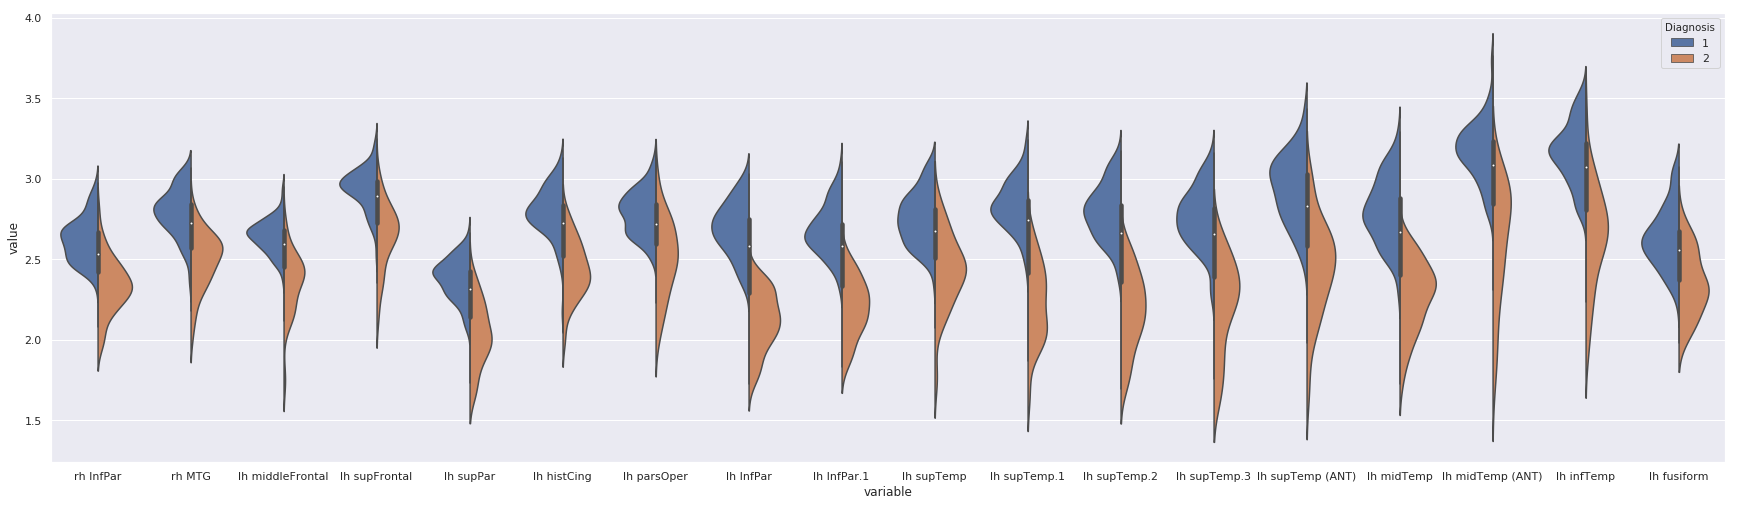

In [220]:

sns.set(rc={'figure.figsize':(30,8.27)})
ax_violin = sns.violinplot(x='variable', y='value', data=long_form, hue="Diagnosis", split=True)

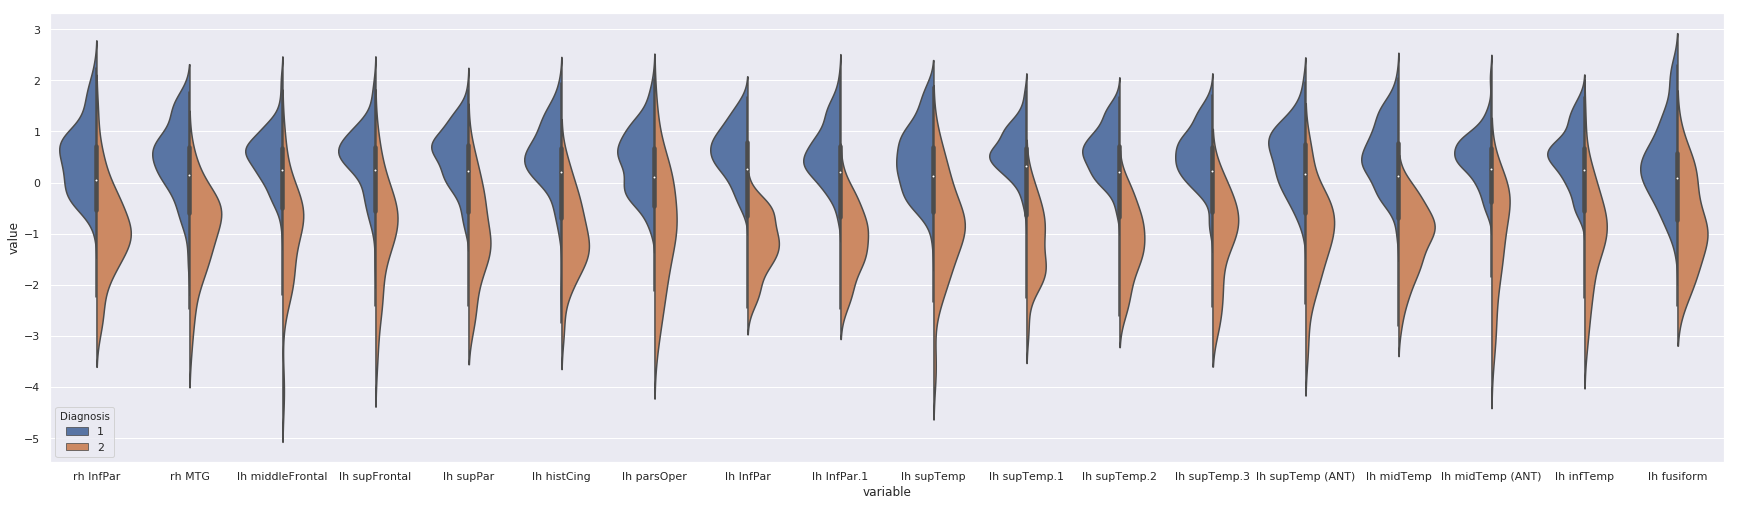

In [237]:
standardized_features = StandardScaler().fit_transform(interaction_features)
standardized_features
interaction_features_standardized = pd.DataFrame({features[i]: [standardized_features[j][i] for j in range(len(standardized_features))] for i in range(len(features))})
interaction_features_standardized
interaction_features_standardized["Diagnosis"] = list(interaction_features_with_diagnosis["Diagnosis"])
long_form_standardized = pd.melt(interaction_features_standardized, id_vars="Diagnosis", value_vars=features)
sns.set(rc={'figure.figsize':(30,8.27)})
ax_violin = sns.violinplot(x='variable', y='value', data=long_form_standardized, hue="Diagnosis", split=True)

In [235]:
20pca = PCA(n_components=2)
#pca.components_ 
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head()

SyntaxError: ignored

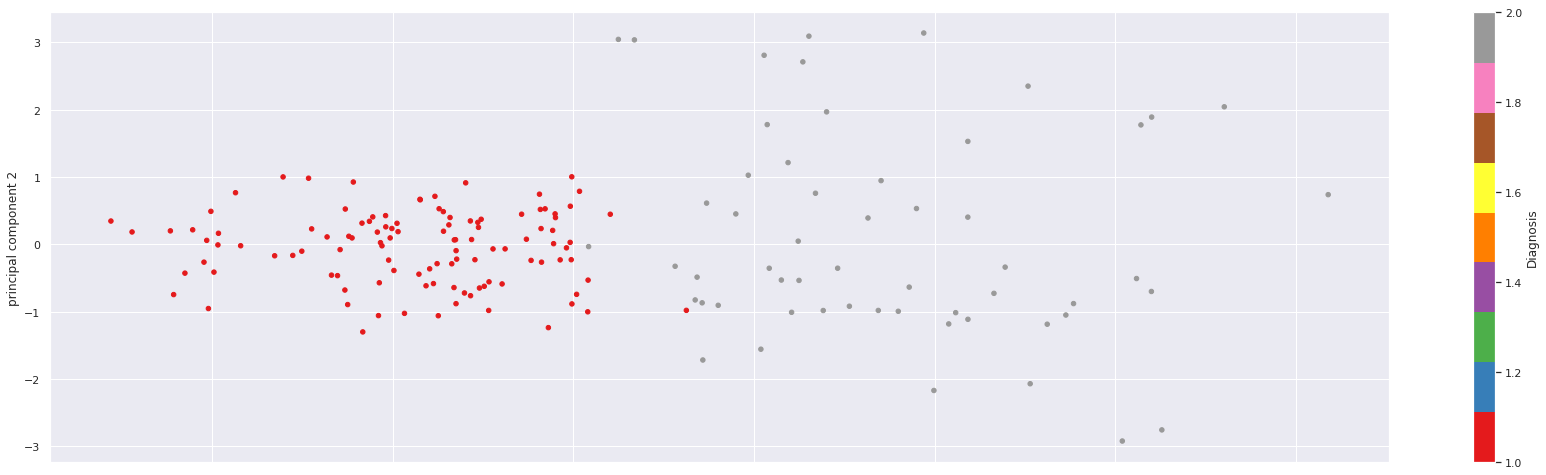

In [217]:
unclustered_pca = pca_2D_raw(interaction)
unclustered_pca["Diagnosis"] = interaction["Diagnosis"]
ax_unclustered = unclustered_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Diagnosis", colormap="Set1")

In [139]:
interaction_2_clusters = interaction_features.copy()
km_2 = KMeans(n_clusters = 2)
interaction_two_clusters = km_2.fit(interaction_2_clusters)
two_labels = interaction_two_clusters.labels_
interaction_2_clusters['Cluster'] = two_labels
interaction_2_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,0
1,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,0
2,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,0
3,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,0
4,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,0


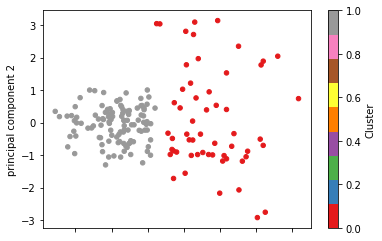

In [62]:
two_cluster_pca = principalDf.copy()
two_cluster_pca["Cluster"] = interaction_2_clusters["Cluster"]
two_cluster_pca["Diagnosis"] = interaction["Diagnosis"]
ax_2_cluster = two_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_2_cluster)
plt.show(ax_unclustered)

In [64]:
interaction_3_clusters = interaction_features.copy()
km_3 = KMeans(n_clusters = 3)
interaction_three_clusters = km_3.fit(interaction_3_clusters)
three_labels = interaction_three_clusters.labels_
interaction_3_clusters['Cluster'] = three_labels
#adjusting cluster numbers
for i in interaction_3_clusters["Cluster"]:
  if i == 0:
    i = 1
  elif i == 1:
    i=0
interaction_3_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,2
1,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,2
2,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,2
3,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,2
4,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,2


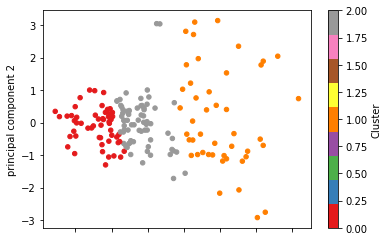

In [65]:
three_cluster_pca = principalDf.copy()
three_cluster_pca["Cluster"] = interaction_3_clusters["Cluster"]
three_cluster_pca["Diagnosis"] = interaction["Diagnosis"]
ax_3_cluster = three_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_3_cluster)
plt.show(ax_unclustered)

In [66]:
interaction_4_clusters = interaction_features.copy()
km_4 = KMeans(n_clusters = 4)
interaction_four_clusters = km_4.fit(interaction_4_clusters)
four_labels = interaction_four_clusters.labels_
interaction_4_clusters['Cluster'] = four_labels
#adjusting cluster numbers
for i in interaction_3_clusters["Cluster"]:
  if i == 2:
    i = 1
interaction_4_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,1
1,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,1
2,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,1
3,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,1
4,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,1


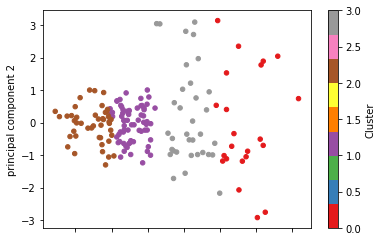

In [67]:
#PCA
four_cluster_pca = principalDf.copy()
four_cluster_pca["Cluster"] = interaction_4_clusters["Cluster"]
four_cluster_pca["Diagnosis"] = interaction["Diagnosis"]
ax_4_cluster = four_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_4_cluster)
plt.show(ax_unclustered)

In [68]:
interaction_5_clusters = interaction_features.copy()
km_5 = KMeans(n_clusters = 5)
interaction_five_clusters = km_5.fit(interaction_5_clusters)
five_labels = interaction_five_clusters.labels_
interaction_5_clusters['Cluster'] = five_labels
#adjusting cluster numbers
interaction_5_clusters["Cluster"]
interaction_5_clusters.head()

,rh InfPar,rh MTG,lh middleFrontal,lh supFrontal,lh supPar,lh histCing,lh parsOper,lh InfPar,lh InfPar.1,lh supTemp,lh supTemp.1,lh supTemp.2,lh supTemp.3,lh supTemp (ANT),lh midTemp,lh midTemp (ANT),lh infTemp,lh fusiform,Cluster
0,2.435025,2.486538,2.449232,3.013817,2.372756,2.793440,2.623092,2.761951,2.613018,2.528117,2.733058,2.567443,2.505918,2.585626,2.510154,3.131968,3.221401,2.591300,2
1,2.533837,2.522619,2.499227,3.093641,2.144609,2.873622,2.639902,2.819922,2.780519,2.594153,2.837386,2.538726,2.489180,2.708677,2.428494,2.976380,3.197284,2.561221,2
2,2.525084,2.733200,2.576213,2.744307,2.227129,2.762098,2.820198,2.423877,2.639062,2.775294,2.889400,2.822520,2.819142,3.036786,2.707346,3.263121,3.180746,2.722235,2
3,2.510786,2.746310,2.544900,2.705370,2.240373,2.799020,2.832439,2.462700,2.644606,2.714664,2.870739,2.801379,2.857939,2.989522,2.649812,3.202901,3.147591,2.691607,2
4,2.613600,2.621201,2.680738,2.960390,2.113874,2.724816,2.950272,2.610589,2.844543,2.578698,2.759906,2.619046,2.308445,2.566316,2.579034,2.804546,3.084427,2.588574,2


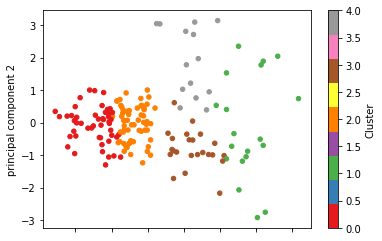

In [69]:
#PCA
five_cluster_pca = principalDf.copy()
five_cluster_pca["Cluster"] = interaction_5_clusters["Cluster"]
five_cluster_pca["Diagnosis"] = interaction["Diagnosis"]
ax_5_cluster = five_cluster_pca.plot.scatter(x='principal component 1', y='principal component 2', c="Cluster", colormap="Set1")
plt.show(ax_5_cluster)
plt.show(ax_unclustered)

In [70]:
import os
os.getcwd()
os.listdir(os.getcwd())

['.config', 'sample_data']

In [71]:
#load data: DMN_ROIs is shown
data = pd.read_csv('thick_long_lvPPA_DMN_ROIs.csv')

FileNotFoundError: ignored

In [0]:
data.head()

NameError: ignored